In [1]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from src import data_loader, data_transformer, table_manager, graph_builder, utils

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
def plot_graph(graph, timestamp):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color='gray')
    plt.title(f"Graph for timestamp {timestamp}")
    plt.show()

In [3]:
def main():
    try:
        logging.info("Loading data...")
        config = utils.load_config('config.yaml')
        dfs = data_loader.load_csv_files(config['input_files'])
        logging.info(f"Loaded {len(dfs)} dataframes")
        
        # Visualize input data
        # logging.info("Visualizing input data...")
        # visualize_input_data(dfs)
        
        # Preprocess data
        logging.info("Preprocessing data...")
        processed_dfs = data_transformer.preprocess_data(dfs)
        
        # Display the temporal table
        logging.info("Displaying the temporal table...")
        temporal_table = table_manager.create_temporal_table(processed_dfs)
        print("Temporal Table:")
        print(temporal_table.head())
        
        # Create cross-sectional table
        logging.info("Creating cross-sectional table...")
        cross_sectional_table = table_manager.create_cross_sectional_table(processed_dfs)
        
        # Build graphs
        logging.info("Building graphs...")
        graphs = graph_builder.build_graphs(cross_sectional_table, temporal_table)
        
        # Plot and log graph details
        for timestamp, graph in graphs.items():
            logging.info(f"Graph for timestamp {timestamp}: Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")
            plot_graph(graph, timestamp)
        
        logging.info("Processing completed successfully.")
    except Exception as e:
        logging.error(f"An error occurred: {str(e)}")
        raise

2024-07-23 10:55:05,086 - INFO - Loading data...
2024-07-23 10:55:05,094 - INFO - Loaded 3 dataframes
2024-07-23 10:55:05,094 - INFO - Preprocessing data...
2024-07-23 10:55:05,114 - INFO - Displaying the temporal table...
2024-07-23 10:55:05,122 - INFO - Creating cross-sectional table...
2024-07-23 10:55:05,124 - INFO - Building graphs...
2024-07-23 10:55:05,173 - INFO - Graph for timestamp nan: Nodes: 2715, Edges: 0


Temporal Table:
                        unique_id  correlated_value2 value  timestamp variable
0   table_0_-0.0092036702781682_0          -0.009204   NaN        NaN       -1
1   table_0_-0.0167179765534256_0          -0.016718   NaN        NaN       -1
2  table_0_-0.0192476552822084_-1          -0.019248     A        NaN       -1
3    table_0_-0.020659961229369_0          -0.020660   NaN        NaN       -1
4  table_0_-0.0217188716003856_-1          -0.021719     D        NaN       -1


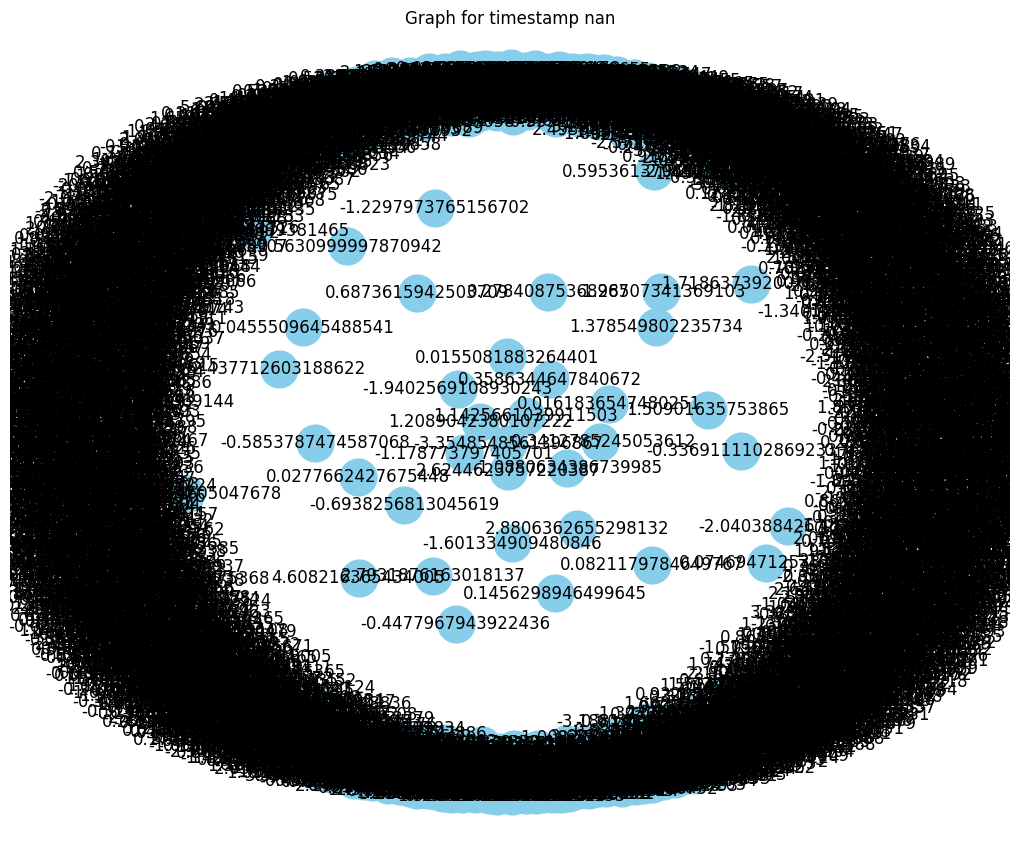

2024-07-23 10:55:23,342 - INFO - Processing completed successfully.


In [4]:
main()